In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup	 

In [2]:
def scrape_stats(base_url):
     dados = range(1,)
     final_df = pd.DataFrame()

     for dados in dados:
        print('Extraindo ...')
        req_url = base_url
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'class':'tabela_estimativa tabela2'})
        df = pd.read_html(str(table))[0]
        final_df = final_df.append(df)
     return final_df
url = 'https://www.inca.gov.br/estimativa/estado-capital/brasil/tabela2'
df = scrape_stats(url)
print('Extração concluída com sucesso.')

Extraindo ...
Extração concluída com sucesso.


In [3]:
df.head()

,Estado,Mama Feminina,Próstata,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Glândula Tireoide,Linfoma não Hodgkin,Esôfago,Sistema Nervoso Central,Leucemias,Bexiga,Pele Melanoma,Laringe,Ovário,Corpo do útero,Linfoma de Hodgkin,Outras Localizações,"Todas as neoplasias, exceto pele não melanoma",Pele não melanoma,Todas as neoplasias malignas
0,Acre,100.0,120.0,50.0,100.0,90.0,90.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,20.0,20.0,**,**,20.0,180.00,960.00,280.00,1.24
1,Amapá,70.0,100.0,20.0,50.0,80.0,90.0,30.0,20.0,20.0,20.0,20.0,30.0,20.0,20.0,20.0,**,**,20.0,150.00,800.00,70.00,870.00
2,Amazonas,450.0,480.0,230.0,320.0,380.0,700.0,120.0,60.0,90.0,50.0,150.0,180.0,40.0,30.0,90.0,80,90,40.0,740.00,4.32,1.09,5.41
3,Pará,780.0,930.0,470.0,560.0,860.0,780.0,220.0,120.0,140.0,140.0,220.0,320.0,110.0,50.0,100.0,120,70,30.0,1.57,7.59,1.66,9.25
4,Rondônia,220.0,310.0,130.0,180.0,120.0,130.0,60.0,40.0,40.0,50.0,70.0,70.0,40.0,30.0,40.0,30,20,20.0,500.00,2.10,990.00,3.09


In [4]:

df.tail()

,Estado,Mama Feminina,Próstata,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Glândula Tireoide,Linfoma não Hodgkin,Esôfago,Sistema Nervoso Central,Leucemias,Bexiga,Pele Melanoma,Laringe,Ovário,Corpo do útero,Linfoma de Hodgkin,Outras Localizações,"Todas as neoplasias, exceto pele não melanoma",Pele não melanoma,Todas as neoplasias malignas
23,São Paulo,18.28,13.65,14.67,6.89,4.88,2.25,4.30,5.03,3.82,2.34,2.14,2.30,4.02,3.35,1.98,1.590,1.600,830.00,23.21,117.13,40.22,157.35
24,Paraná,3.47,3.56,2.48,1.99,1.39,990.00,910.00,440.00,690.00,900.00,810.00,720.00,620.00,540.00,470.00,390,480,190.00,5.62,26.66,8.39,35.05
25,Rio Grande do Sul,4.05,3.98,2.54,3.74,1.09,720.00,660.00,480.00,760.00,1.29,950.00,790.00,580.00,570.00,430.00,430,220,110.00,6.87,30.26,15.80,46.06
26,Santa Catarina,3.37,1.72,2.35,1.77,1.29,970.00,1.05,280.00,940.00,660.00,700.00,920.00,730.00,860.00,520.00,260,300,130.00,5.31,24.13,9.33,33.46
27,Brasil,66.28,65.84,41.01,30.20,21.23,16.71,15.21,14.26,12.03,11.39,11.10,10.81,10.64,8.45,7.65,6.650,6.540,2.64,90.45,449.09,176.94,626.03


In [6]:
df.dtypes

Estado                                            object
Mama Feminina                                    float64
Próstata                                         float64
Cólon e Reto                                     float64
Traquéia, Brônquio e Pulmão                      float64
Estômago                                         float64
Colo do Útero                                    float64
Cavidade Oral                                    float64
Glândula Tireoide                                float64
Linfoma não Hodgkin                              float64
Esôfago                                          float64
Sistema Nervoso Central                          float64
Leucemias                                        float64
Bexiga                                           float64
Pele Melanoma                                    float64
Laringe                                          float64
Ovário                                            object
Corpo do útero                 

In [7]:
for c in df[['Mama Feminina', 'Próstata',	'Cólon e Reto',	'Traquéia, Brônquio e Pulmão',	'Estômago',	'Colo do Útero',
             'Cavidade Oral',	'Glândula Tireoide',	'Linfoma não Hodgkin',	'Esôfago',	'Sistema Nervoso Central',	'Leucemias',
             'Bexiga',	'Pele Melanoma',	'Laringe',	'Ovário',	'Corpo do útero',	'Linfoma de Hodgkin',	'Outras Localizações',
             'Todas as neoplasias, exceto pele não melanoma',	'Pele não melanoma',	'Todas as neoplasias malignas']]:
  df[c] = df[c].replace('**', 0)
  df[c] = df[c].apply(pd.to_numeric)
df.head()

,Estado,Mama Feminina,Próstata,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Glândula Tireoide,Linfoma não Hodgkin,Esôfago,Sistema Nervoso Central,Leucemias,Bexiga,Pele Melanoma,Laringe,Ovário,Corpo do útero,Linfoma de Hodgkin,Outras Localizações,"Todas as neoplasias, exceto pele não melanoma",Pele não melanoma,Todas as neoplasias malignas
0,Acre,100.0,120.0,50.0,100.0,90.0,90.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,20.0,20.0,0.0,0.0,20.0,180.00,960.00,280.00,1.24
1,Amapá,70.0,100.0,20.0,50.0,80.0,90.0,30.0,20.0,20.0,20.0,20.0,30.0,20.0,20.0,20.0,0.0,0.0,20.0,150.00,800.00,70.00,870.00
2,Amazonas,450.0,480.0,230.0,320.0,380.0,700.0,120.0,60.0,90.0,50.0,150.0,180.0,40.0,30.0,90.0,80.0,90.0,40.0,740.00,4.32,1.09,5.41
3,Pará,780.0,930.0,470.0,560.0,860.0,780.0,220.0,120.0,140.0,140.0,220.0,320.0,110.0,50.0,100.0,120.0,70.0,30.0,1.57,7.59,1.66,9.25
4,Rondônia,220.0,310.0,130.0,180.0,120.0,130.0,60.0,40.0,40.0,50.0,70.0,70.0,40.0,30.0,40.0,30.0,20.0,20.0,500.00,2.10,990.00,3.09


In [8]:
# Normalizando dados

for c in df[['Mama Feminina', 'Próstata',	'Cólon e Reto',	'Traquéia, Brônquio e Pulmão',	'Estômago',	'Colo do Útero',
             'Cavidade Oral',	'Glândula Tireoide',	'Linfoma não Hodgkin',	'Esôfago',	'Sistema Nervoso Central',	'Leucemias',
             'Bexiga',	'Pele Melanoma',	'Laringe',	'Ovário',	'Corpo do útero',	'Linfoma de Hodgkin',	'Outras Localizações',
             'Todas as neoplasias, exceto pele não melanoma',	'Pele não melanoma',	'Todas as neoplasias malignas']]:
  df[c] = df[c] / df[c].max()
df.head()


,Estado,Mama Feminina,Próstata,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Glândula Tireoide,Linfoma não Hodgkin,Esôfago,Sistema Nervoso Central,Leucemias,Bexiga,Pele Melanoma,Laringe,Ovário,Corpo do útero,Linfoma de Hodgkin,Outras Localizações,"Todas as neoplasias, exceto pele não melanoma",Pele não melanoma,Todas as neoplasias malignas
0,Acre,0.117647,0.129032,0.052083,0.106383,0.104651,0.090909,0.021978,0.026667,0.021277,0.022222,0.021053,0.031250,0.020408,0.022989,0.024691,0.000000,0.000000,0.024096,0.185567,1.000000,0.282828,0.001425
1,Amapá,0.082353,0.107527,0.020833,0.053191,0.093023,0.090909,0.032967,0.026667,0.021277,0.022222,0.021053,0.031250,0.020408,0.022989,0.024691,0.000000,0.000000,0.024096,0.154639,0.833333,0.070707,1.000000
2,Amazonas,0.529412,0.516129,0.239583,0.340426,0.441860,0.707071,0.131868,0.080000,0.095745,0.055556,0.157895,0.187500,0.040816,0.034483,0.111111,0.096386,0.134328,0.048193,0.762887,0.004500,0.001101,0.006218
3,Pará,0.917647,1.000000,0.489583,0.595745,1.000000,0.787879,0.241758,0.160000,0.148936,0.155556,0.231579,0.333333,0.112245,0.057471,0.123457,0.144578,0.104478,0.036145,0.001619,0.007906,0.001677,0.010632
4,Rondônia,0.258824,0.333333,0.135417,0.191489,0.139535,0.131313,0.065934,0.053333,0.042553,0.055556,0.073684,0.072917,0.040816,0.034483,0.049383,0.036145,0.029851,0.024096,0.515464,0.002188,1.000000,0.003552


Text(0.5, 1.0, 'Mortalidade de Leucemia por Estado')

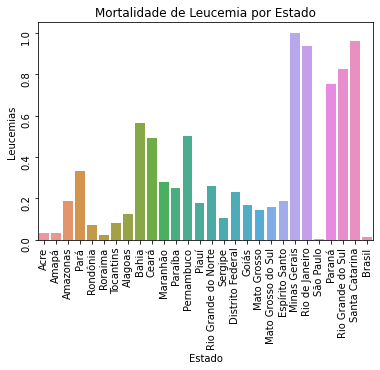

In [9]:
ax = sns.barplot(x="Estado", y="Leucemias", data=df)
ax.tick_params(labelrotation=90)
ax.set_title("Mortalidade de Leucemia por Estado")

Text(0.5, 1.0, 'Mortalidade de neoplasias malignas por Estado')

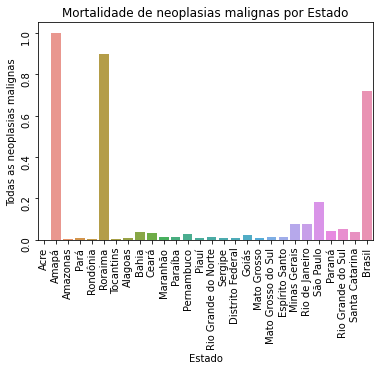

In [11]:
# sns.lineplot(x=Gini_not_null.year, y=np.log( Gini_not_null.gini ), label='Brasil')
ax = sns.barplot(x="Estado", y="Todas as neoplasias malignas", data=df)
ax.tick_params(labelrotation=90)
ax.set_title("Mortalidade de neoplasias malignas por Estado")

Text(0.5, 1.0, 'Mortalidade de Leucemia por Estado')

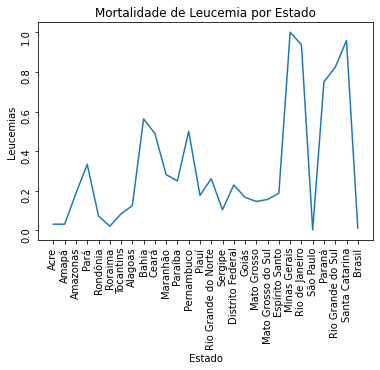

In [12]:
ax = sns.lineplot(x="Estado", y="Leucemias", data=df)
ax.tick_params(labelrotation=90)
ax.set_title("Mortalidade de Leucemia por Estado")

# Nova seção

# Nova seção